In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
def img_show(img):
    fig = plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [3]:
def img_save(img, img_name):
    fig = plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    path = 'digits/%s' % str(np.random.rand())[2:]
    fig.savefig(path, bbox_inches='tight', pad_inches=0)
    plt.show()

In [7]:
def main():
    img = cv.imread('halftone.png', 0)
    ret, thresh = cv.threshold(img, 125, 255, cv.THRESH_BINARY)
    img2, contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    img_show(img)
    for i, j in enumerate(contours):        
        [x,y,w,h] = cv.boundingRect(j)
        if  h > 10:
            cv.rectangle(thresh, (x - 10, y - 10), (x + w + 10, y + h + 10), (0, 255, 0), 2)
            roi = thresh[y - 10 : y + h + 10, x - 10 : x + w + 10]
            img_save(roi, i)
            roismall = cv.resize(roi, (10, 10))
            roismall = roismall.reshape((1, 100))
            roismall = np.float32(roismall)
    img_save(thresh, 0)

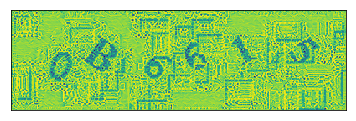

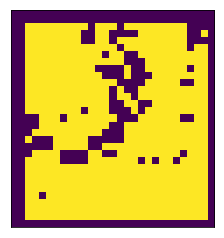

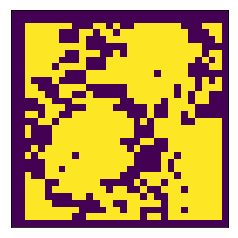

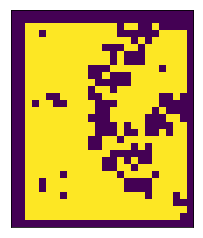

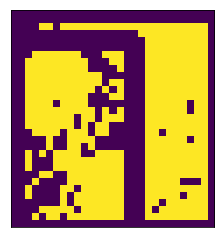

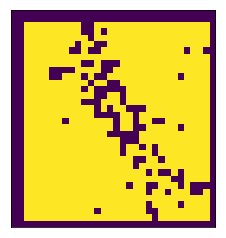

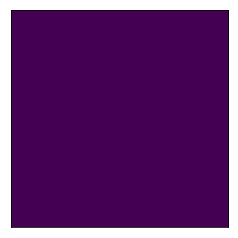

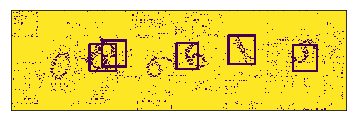

In [8]:
main()